# Classfication project

In [2]:
pip install ucimlrepo

In [287]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
raisin = fetch_ucirepo(id=850) 
  
# data (as pandas dataframes) 
X = raisin.data.features 
y = raisin.data.targets 
  
# metadata 
print(raisin.metadata) 
  
# variable information 
print(raisin.variables) 


{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar, Murat Koklu, Sakir Tasdemir

In [288]:
X.head

<bound method NDFrame.head of       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  
0    0.758651   1184.040  
1    0.684130   1121.786  


In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
np.unique(y)

array(['Besni', 'Kecimen'], dtype=object)

In [295]:
y

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen
...,...
895,Besni
896,Besni
897,Besni
898,Besni


In [297]:
X.shape

(900, 7)

## Missing Values

In [300]:
X.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
dtype: int64

In [302]:
y.isnull().sum()

Class    0
dtype: int64

## Outliers Handling

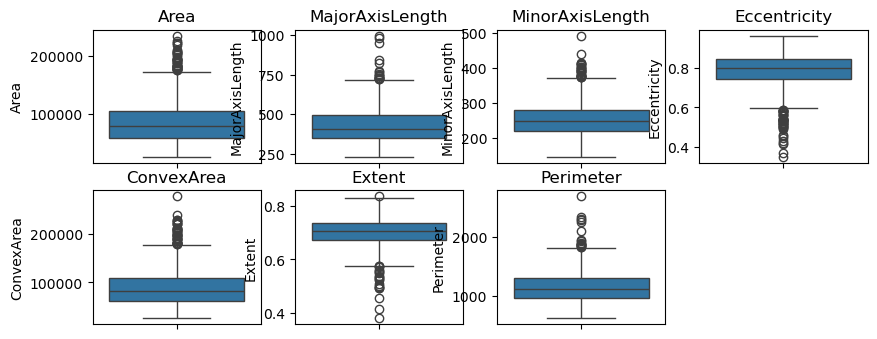

In [305]:
plt.figure(figsize=(10,8))
for i, column in enumerate(X.columns[:],1):
    plt.subplot(4,4,i)
    sns.boxplot(X[column])
    plt.title(column)
plt.show()

In [307]:

def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    df = df[(df[column]>=lower) & (df[column]<=upper)]
    return df


In [308]:
for column in X.columns:
    X_outlier_removed = remove_outlier(X, column)

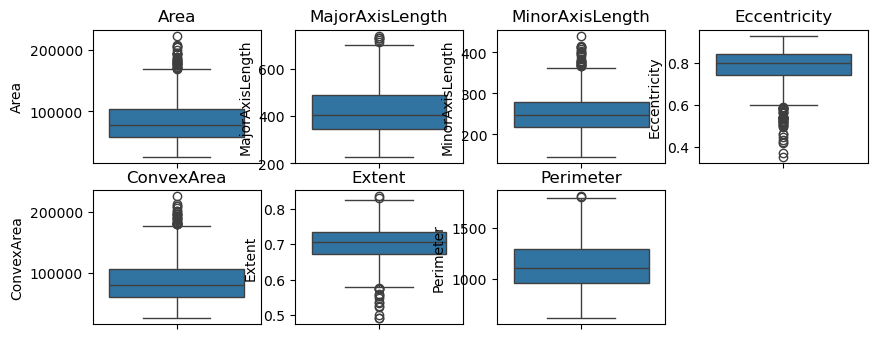

In [309]:
plt.figure(figsize=(10,8))
for i, column in enumerate(X_outlier_removed.columns,1):
    plt.subplot(4,4,i)
    sns.boxplot(X_outlier_removed[column])
    plt.title(column)
plt.show()

## Feature Engineering

In [312]:
from sklearn.preprocessing import PolynomialFeatures

In [315]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [319]:
X_poly = poly.fit_transform(X)

In [321]:
X.shape, X_poly.shape

((900, 7), (900, 35))

In [323]:
poly_features = poly.get_feature_names_out(X.columns)

In [325]:
poly_features

array(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Area^2',
       'Area MajorAxisLength', 'Area MinorAxisLength',
       'Area Eccentricity', 'Area ConvexArea', 'Area Extent',
       'Area Perimeter', 'MajorAxisLength^2',
       'MajorAxisLength MinorAxisLength', 'MajorAxisLength Eccentricity',
       'MajorAxisLength ConvexArea', 'MajorAxisLength Extent',
       'MajorAxisLength Perimeter', 'MinorAxisLength^2',
       'MinorAxisLength Eccentricity', 'MinorAxisLength ConvexArea',
       'MinorAxisLength Extent', 'MinorAxisLength Perimeter',
       'Eccentricity^2', 'Eccentricity ConvexArea', 'Eccentricity Extent',
       'Eccentricity Perimeter', 'ConvexArea^2', 'ConvexArea Extent',
       'ConvexArea Perimeter', 'Extent^2', 'Extent Perimeter',
       'Perimeter^2'], dtype=object)

## Feature Selection

In [328]:
from sklearn.feature_selection import SelectKBest, f_classif

In [330]:
k = 50
selecter = SelectKBest(f_classif, k=k)
X_selected = selecter.fit_transform(X_poly, y)

C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=50 is greater than n_features=35. All the features will be returned.
  warnings.warn(
C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [332]:
y.shape

(900, 1)

In [334]:
y.ndim

2

In [336]:
type(y)

pandas.core.frame.DataFrame

In [338]:
y = y.values

In [340]:
type(y)

numpy.ndarray

In [342]:
y.ravel()

array(['Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 

In [344]:
y.ndim

2

In [346]:
y= y.flatten()

In [348]:
y.ndim

1

In [350]:
y

array(['Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 

In [352]:
y.shape

(900,)

In [354]:
X_selected.shape

(900, 35)

In [356]:
X.shape

(900, 7)

In [358]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


## Histogram distribution KDE plot

In [456]:
X.head(3)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575


<Axes: xlabel='Area', ylabel='Count'>

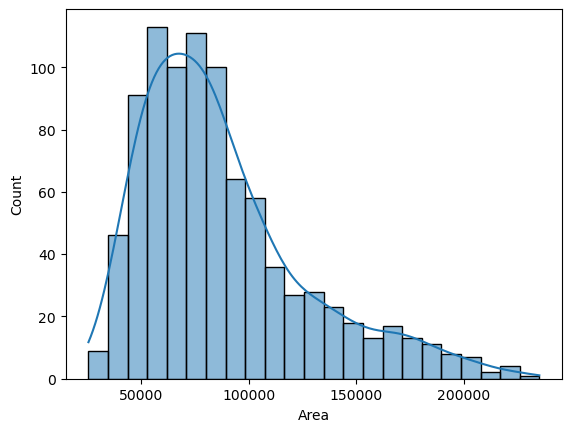

In [462]:
sns.histplot(data = X, x='Area', kde=True)

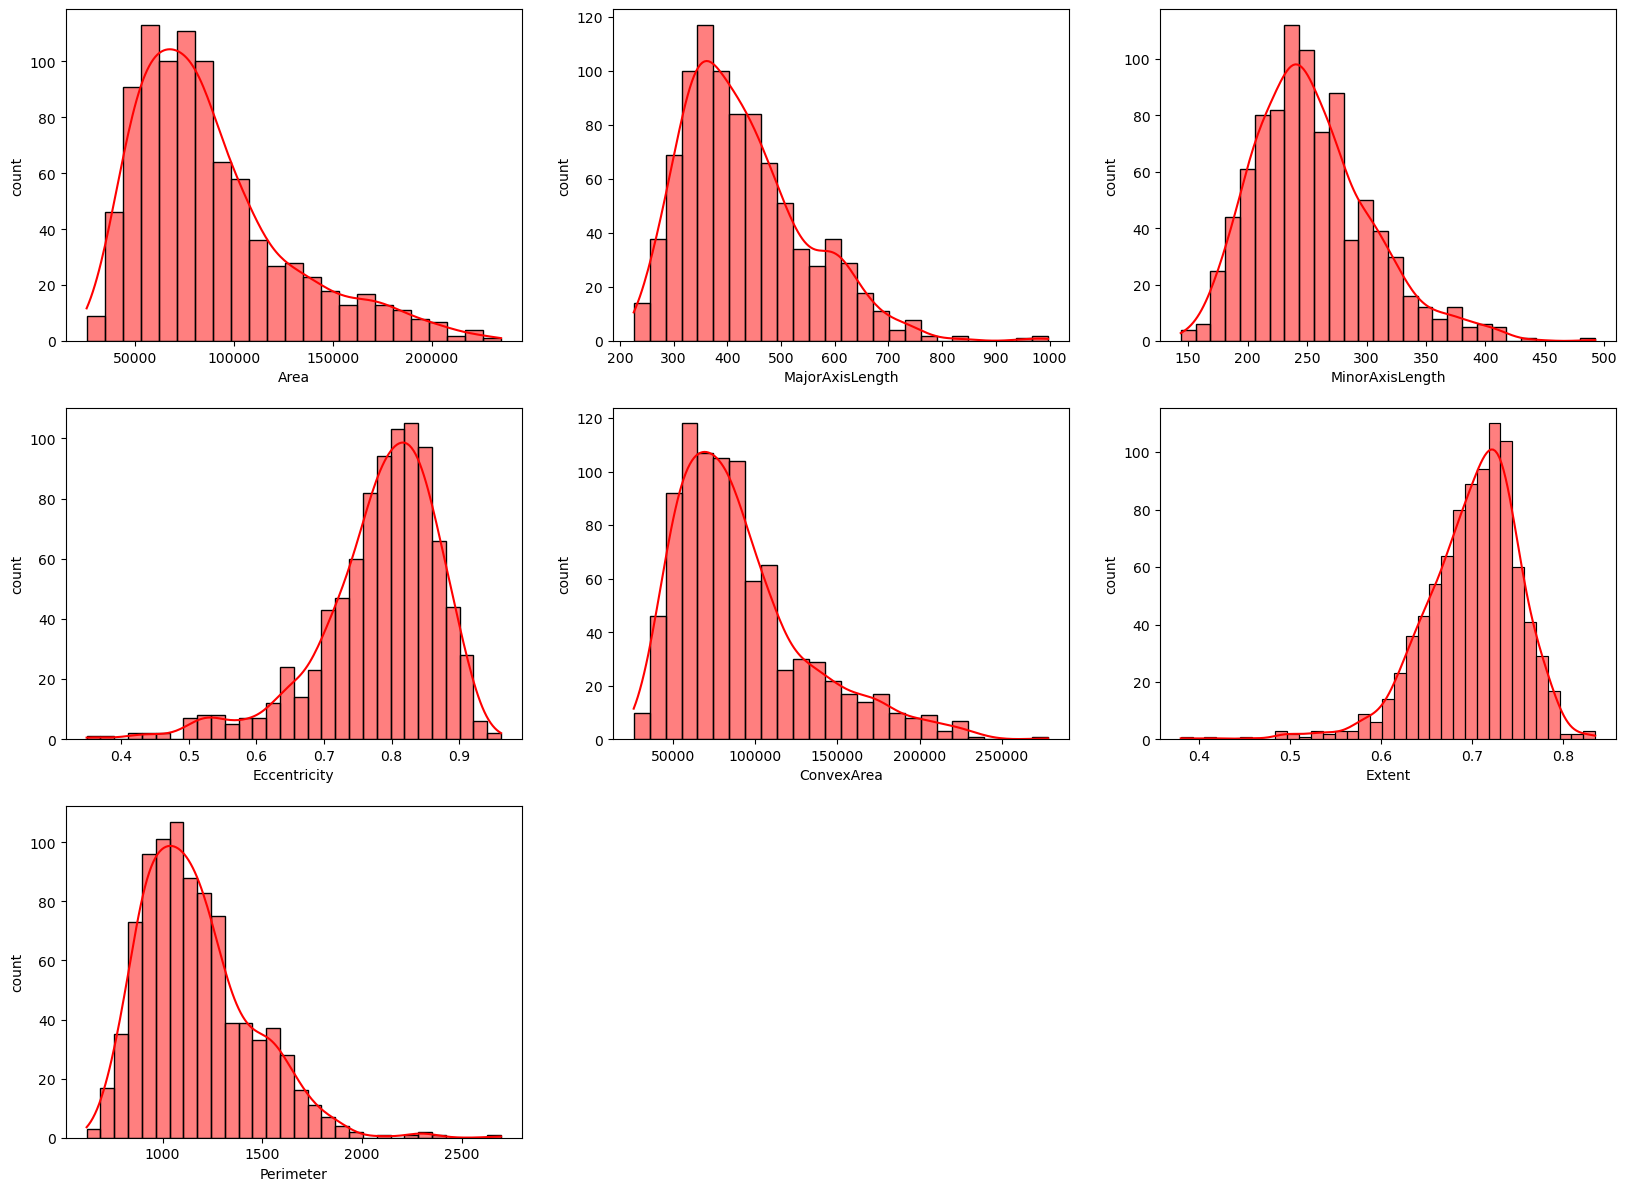

In [469]:
num_features = X.shape[1]
num_cols = 3
num_row = (num_features*2+num_cols-1)//num_cols
plt.figure(figsize=(20, num_row*5))
for i, feature in enumerate(X):
    plt.subplot(num_row, num_cols, i+1)
    sns.histplot(X[feature], color='red', kde=True)
    plt.xlabel(feature)
    plt.ylabel("count")
plt.savefig("histogram2.png", dpi=600)
plt.show()

## Correlation plots

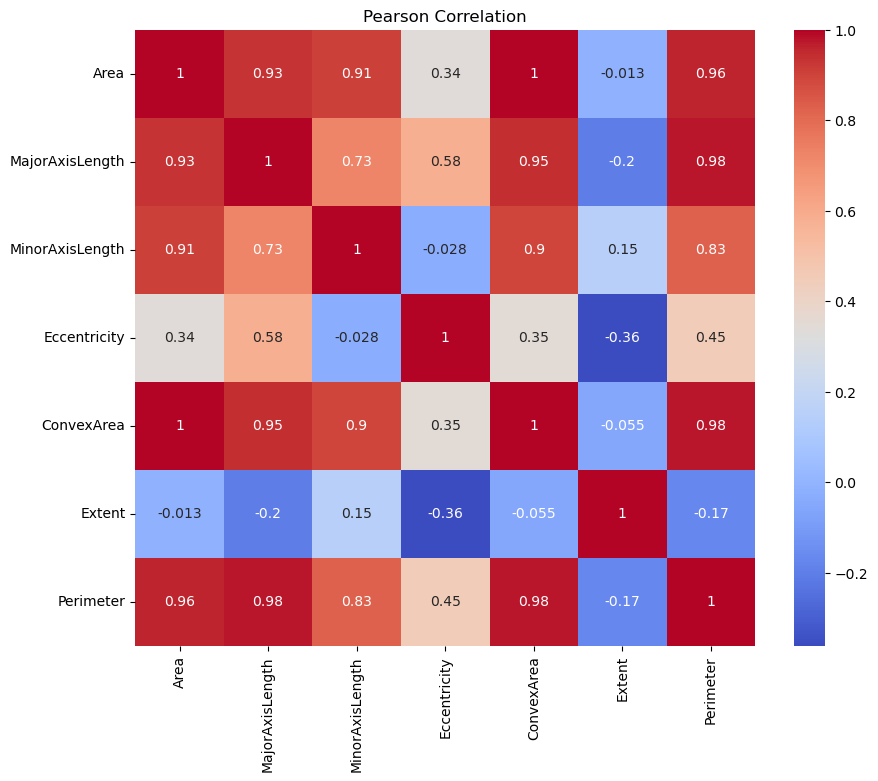

In [468]:
corr_mat = corr_mat = X.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation")
plt.savefig("Pearson2.png", dpi=900)

Text(0.5, 1.0, 'Spearman Correlation')

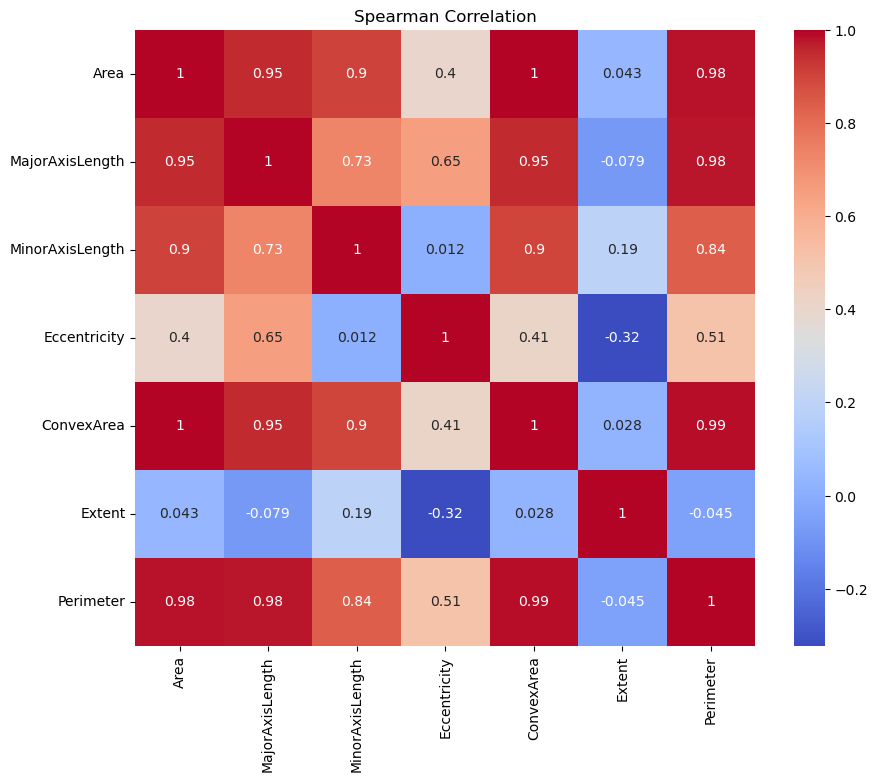

In [473]:
corr_mat = X.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation")

## Pair plot

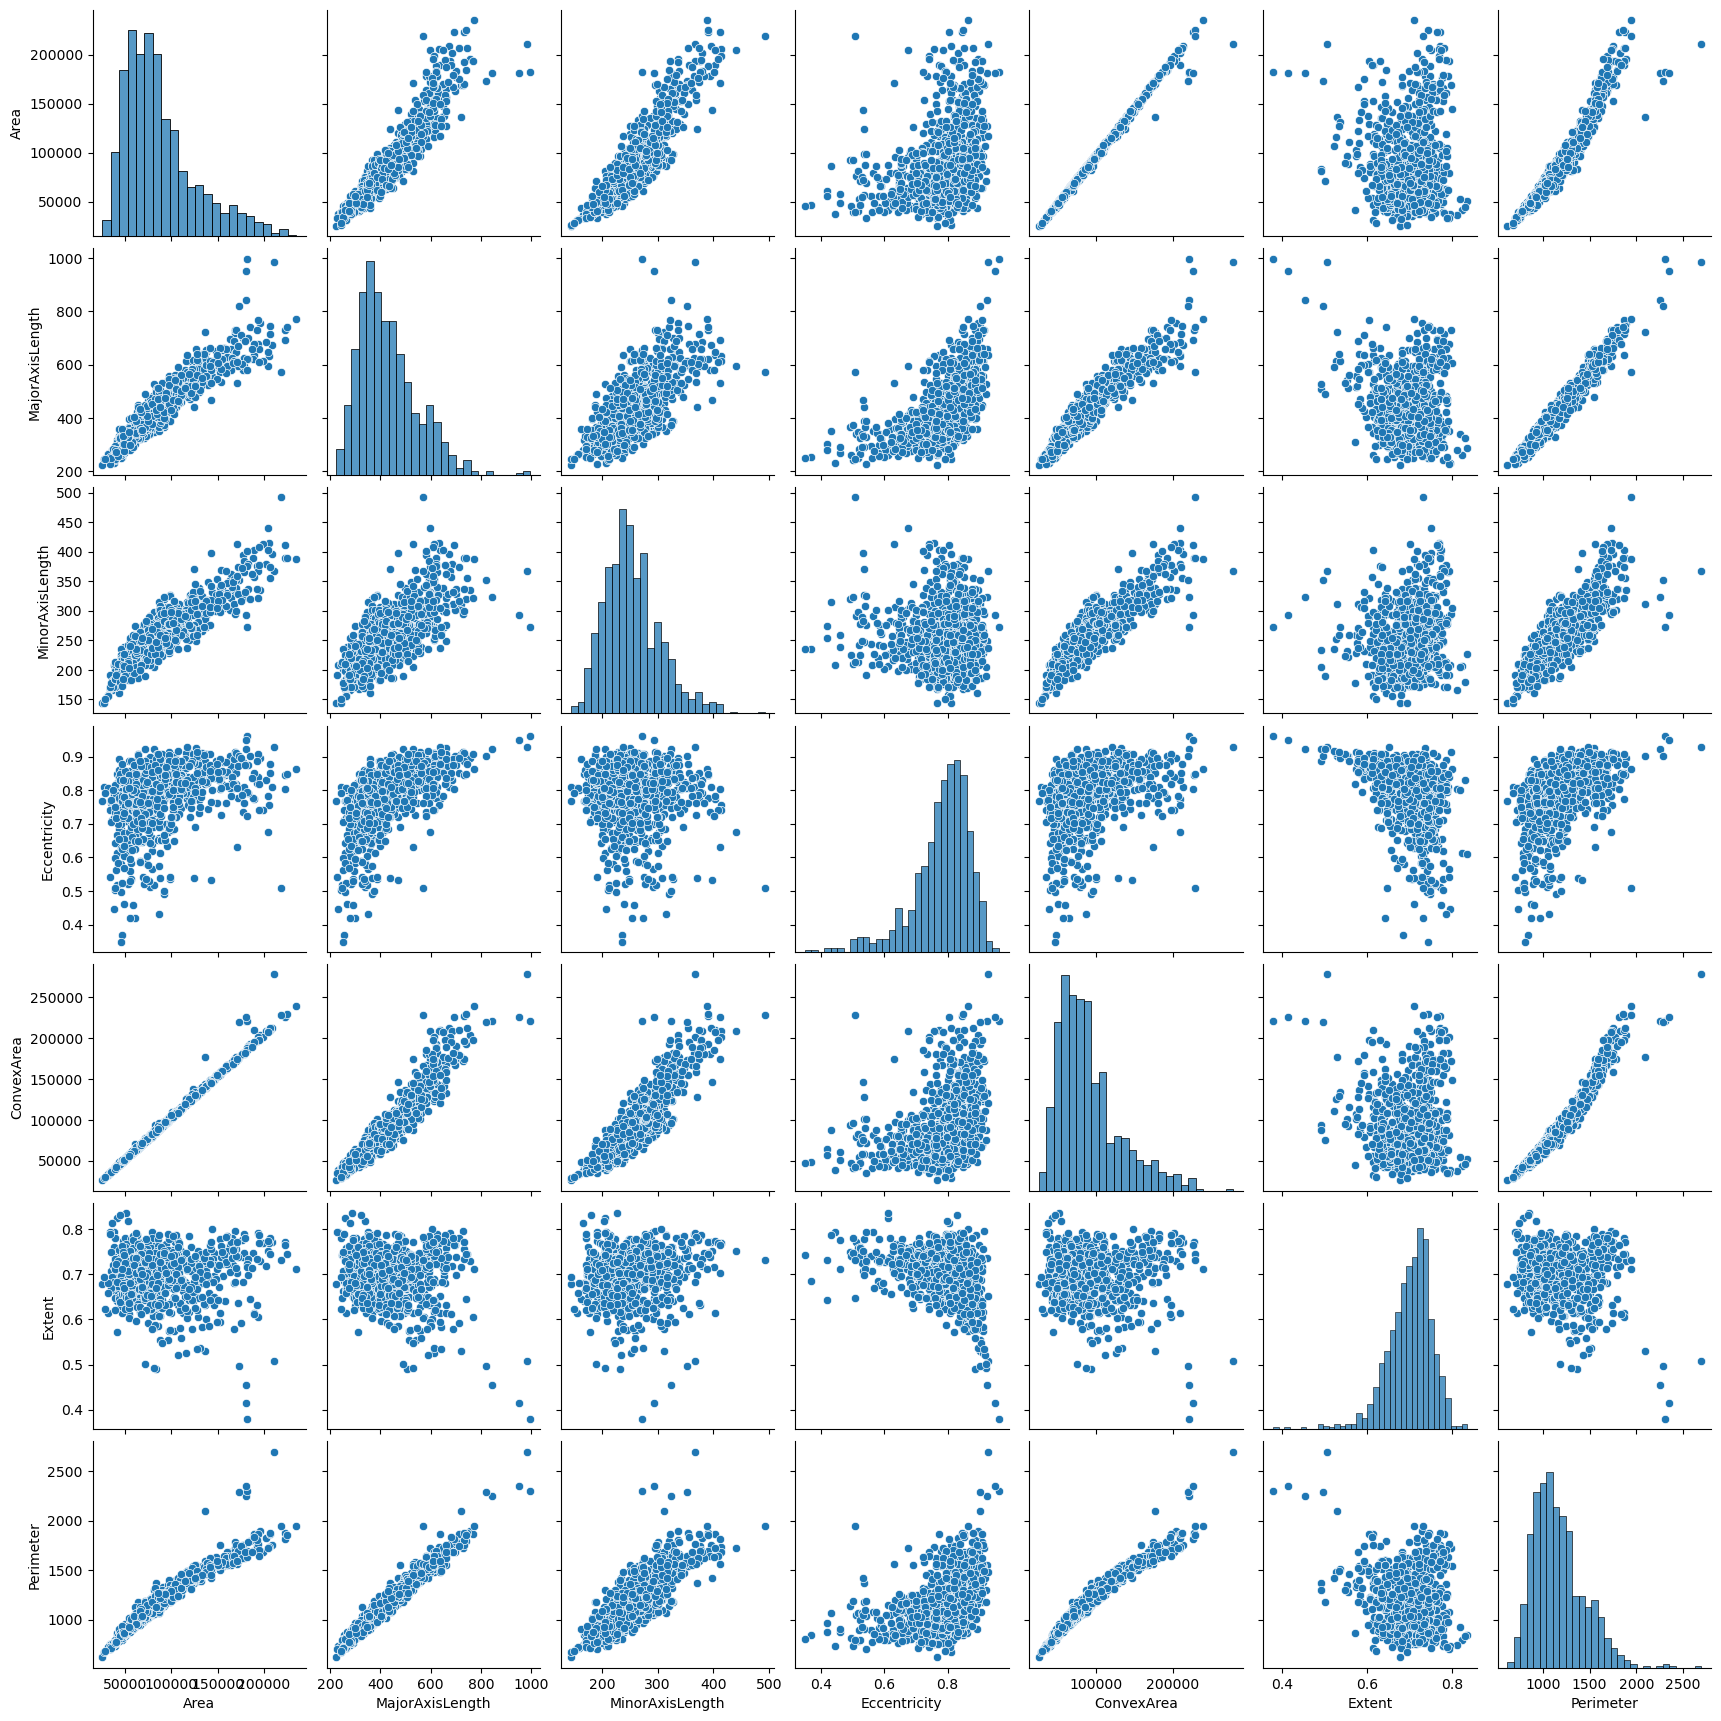

In [471]:
sns.pairplot(X)

## Feature Scaling

In [474]:
X_selected.min(axis=1)

array([0.5755507 , 0.46803327, 0.4065501 , 0.46921023, 0.31810878,
       0.43356477, 0.44341424, 0.49851722, 0.48724717, 0.44139509,
       0.45459386, 0.48590414, 0.46769505, 0.26069583, 0.46264699,
       0.46451111, 0.57270472, 0.48302224, 0.50956496, 0.53009328,
       0.49162669, 0.52360974, 0.47111076, 0.17619317, 0.49569648,
       0.48808004, 0.3411796 , 0.48802496, 0.26742854, 0.55372086,
       0.56559954, 0.48642865, 0.4671866 , 0.55775447, 0.13631784,
       0.26866426, 0.40921107, 0.37383157, 0.52062776, 0.40176821,
       0.40122383, 0.51191774, 0.50948751, 0.24214955, 0.39907126,
       0.41615848, 0.52878769, 0.37553599, 0.53682404, 0.45588226,
       0.43056944, 0.46499438, 0.38066572, 0.40224853, 0.47622818,
       0.44592397, 0.41362652, 0.47844249, 0.29461365, 0.45987933,
       0.47948214, 0.49388651, 0.41241154, 0.43896051, 0.44313401,
       0.48648658, 0.4550221 , 0.42927478, 0.56533804, 0.51629504,
       0.45556575, 0.4574424 , 0.48644069, 0.50816785, 0.48424

In [475]:
X_selected.max(axis=1)

array([8.19857812e+09, 6.20770652e+09, 8.78287609e+09, 2.24069690e+09,
       6.63622037e+09, 2.63867142e+09, 1.92756122e+09, 3.88490424e+09,
       2.00193605e+09, 4.37251562e+09, 7.13349160e+09, 2.02689044e+09,
       2.03698769e+09, 6.21606096e+09, 5.89931525e+09, 1.28121044e+09,
       4.41148356e+09, 4.45062437e+09, 1.99934180e+09, 5.23640377e+09,
       5.16227880e+09, 3.52420322e+09, 7.12791833e+09, 4.19023182e+09,
       9.57755822e+09, 6.00516505e+09, 5.55695702e+09, 3.90525006e+09,
       6.81483270e+09, 4.00056250e+09, 8.22921122e+09, 1.92177024e+09,
       6.01260668e+09, 4.01917961e+09, 2.33047562e+09, 1.85726522e+09,
       3.33206018e+09, 3.18660250e+09, 6.27580840e+09, 2.58877440e+09,
       9.60164814e+09, 5.36776022e+09, 6.28135502e+09, 8.79318798e+09,
       6.42209904e+09, 3.62789382e+09, 5.08668504e+09, 1.85881700e+09,
       2.28503120e+09, 2.93493062e+09, 2.15296000e+09, 1.39982026e+10,
       4.53898638e+09, 2.38017137e+09, 1.28269215e+10, 2.42093521e+09,
      

### Dataset Splitting

In [368]:
from sklearn.model_selection import train_test_split

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [372]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [374]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Decision Tree Model training

In [377]:
from sklearn.tree import DecisionTreeClassifier

In [379]:
model1 = DecisionTreeClassifier() # for original X
model2 = DecisionTreeClassifier() # for X_poly
model3 = DecisionTreeClassifier() # for X_selected

In [381]:
model1.fit(X_train, y_train) # for original X
model2.fit(X_train_1, y_train_1) # for X_poly
model3.fit(X_train_2, y_train_2) # for X_selected

DecisionTreeClassifier()

### Confusion Matrix

In [390]:
pred_original = model1.predict(X_test)
pred_poly = model2.predict(X_test_1)
pred_selected =model3.predict(X_test_2)

### Model Performance

In [393]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

In [395]:
print("Decision Tree Model Performance for original X")
print("Accuracy", accuracy_score(y_test, pred_original))
print("Precision", precision_score(y_test, pred_original, average='micro'))
print("Recall", recall_score(y_test, pred_original, average='micro'))         
print(classification_report(y_test, pred_original))

Decision Tree Model Performance for original X
Accuracy 0.7888888888888889
Precision 0.7888888888888889
Recall 0.7888888888888889
              precision    recall  f1-score   support

       Besni       0.76      0.81      0.79        86
     Kecimen       0.82      0.77      0.79        94

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180



In [397]:
print("Decision Tree Model Performance for X_poly")
print("Accuracy", accuracy_score(y_test_1, pred_poly))
print("Precision", precision_score(y_test_1, pred_poly, average='micro'))
print("Recall", recall_score(y_test_1, pred_poly, average='micro'))         
print(classification_report(y_test_1, pred_poly))

Decision Tree Model Performance for X_poly
Accuracy 0.8
Precision 0.8
Recall 0.8
              precision    recall  f1-score   support

       Besni       0.77      0.84      0.80        86
     Kecimen       0.84      0.77      0.80        94

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180



In [399]:
print("Decision Tree Model Performance for X_selected")
print("Accuracy", accuracy_score(y_test_2, pred_selected))
print("Precision", precision_score(y_test_2, pred_selected, average='micro'))
print("Recall", recall_score(y_test_2, pred_selected, average='micro'))         
print(classification_report(y_test_2, pred_selected))

Decision Tree Model Performance for X_selected
Accuracy 0.8055555555555556
Precision 0.8055555555555556
Recall 0.8055555555555556
              precision    recall  f1-score   support

       Besni       0.77      0.85      0.81        86
     Kecimen       0.85      0.77      0.80        94

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180



In [401]:
conf_mat_original = confusion_matrix(y_test, pred_original)

In [403]:
conf_mat_original

array([[70, 16],
       [22, 72]], dtype=int64)

<Axes: >

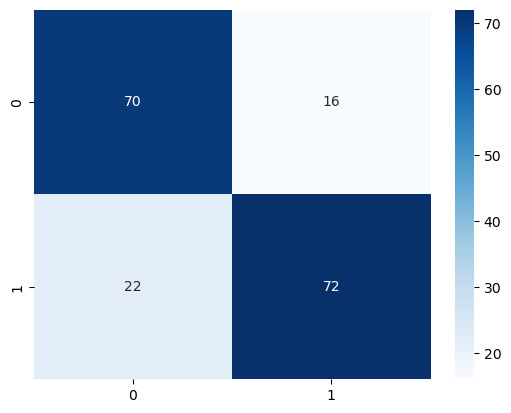

In [405]:
sns.heatmap(conf_mat_original, annot= True, fmt='d', cmap='Blues')

C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


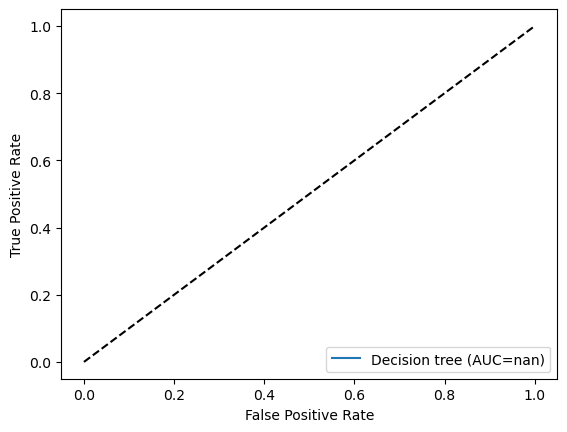

In [406]:
y_pred_prob = model1.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1], pos_label=2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = "Decision tree (AUC=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Random Forest Model training

In [410]:
from sklearn.ensemble import RandomForestClassifier

In [412]:
rf_model = RandomForestClassifier()

In [414]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [416]:
rf_pred = rf_model.predict(X_test)

In [418]:
print("Decision Tree Model Performance for original X")
print("Accuracy", accuracy_score(y_test, pred_original))
print("Precision", precision_score(y_test, pred_original, average='micro'))
print("Recall", recall_score(y_test, pred_original, average='micro'))         
print(classification_report(y_test, pred_original))

Decision Tree Model Performance for original X
Accuracy 0.7888888888888889
Precision 0.7888888888888889
Recall 0.7888888888888889
              precision    recall  f1-score   support

       Besni       0.76      0.81      0.79        86
     Kecimen       0.82      0.77      0.79        94

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180



In [420]:
print("Random Forest Model Performance for original X")
print("Accuracy", accuracy_score(y_test, rf_pred))
print("Precision", precision_score(y_test, rf_pred, average='micro'))
print("Recall", recall_score(y_test, rf_pred, average='micro'))         
print(classification_report(y_test, rf_pred))

Random Forest Model Performance for original X
Accuracy 0.8555555555555555
Precision 0.8555555555555555
Recall 0.8555555555555555
              precision    recall  f1-score   support

       Besni       0.85      0.85      0.85        86
     Kecimen       0.86      0.86      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [422]:
rf_conf_mat_original = confusion_matrix(y_test, rf_pred)

<Axes: >

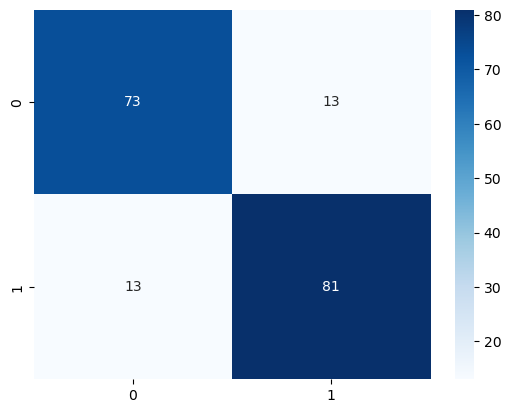

In [424]:
sns.heatmap(rf_conf_mat_original, annot= True, fmt='d', cmap='Blues')

C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


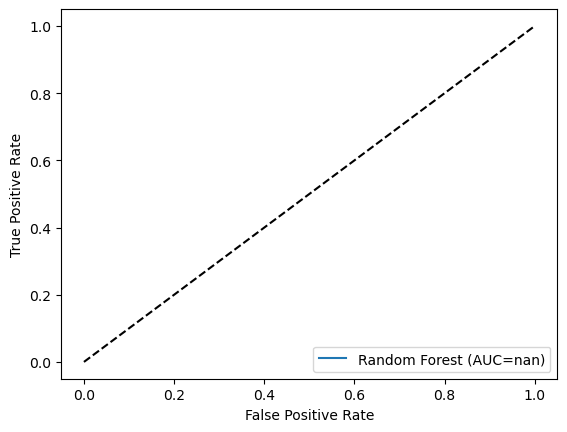

In [426]:
rf_y_pred_prob = rf_model.predict_proba(X_test)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_prob[:,1], pos_label=2)
roc_auc = auc(rf_fpr, rf_tpr)
plt.plot(fpr, tpr, label = "Random Forest (AUC=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [428]:
from sklearn.model_selection import learning_curve

In [430]:
def plot_learning_curve(estimator, X_train, y_train, cv=None, train_sizes=np.linspace(0.1,1.0,5), title= "Model"):
    train_size, train_score, test_score = learning_curve(estimator, X_train, y_train, cv=cv, train_sizes=train_sizes)
    train_score_mean = -np.mean(train_score, axis=1)
    test_score_mean = -np.mean(test_score, axis=1)
    plt.figure(figsize=(10,6))
    plt.plot(train_size,train_score_mean, 'o-', color='red', label ='Training Error')
    plt.plot(train_size,test_score_mean, 'o-', color='green', label ='Testing Error')
    plt.xlabel("Training Sample")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.title(title)
    plt.grid(True)
    plt.show()





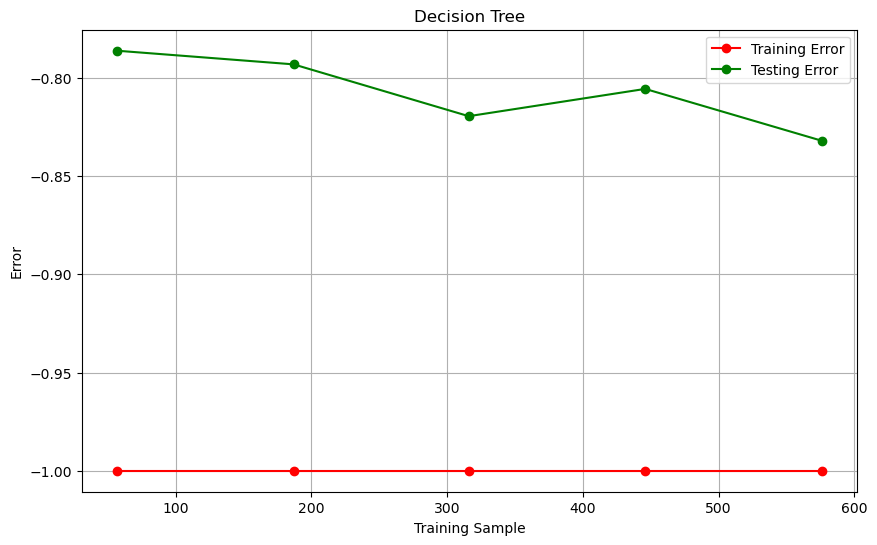

In [432]:
plot_learning_curve(model1, X_train, y_train, cv=5, title= "Decision Tree")

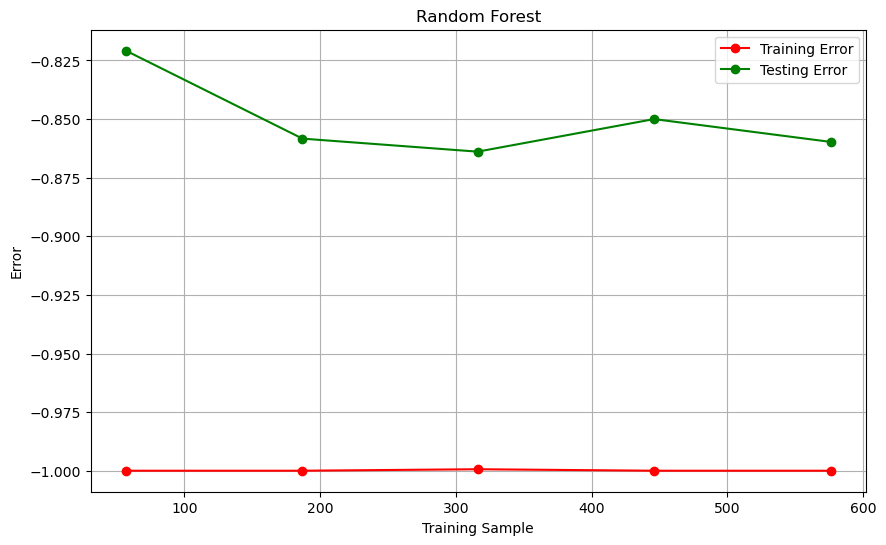

In [433]:
plot_learning_curve(rf_model, X_train, y_train, cv=5, title= "Random Forest")

# Feature Importance Analysis

In [436]:
importance = model1.feature_importances_

In [437]:
rf_importance = rf_model.feature_importances_

In [439]:
importance

array([0.0372884 , 0.63381354, 0.04298825, 0.0687928 , 0.02297921,
       0.09535585, 0.09878195])

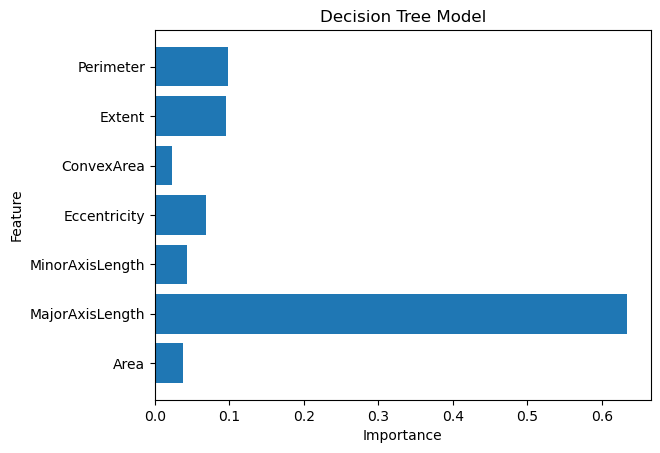

In [440]:
plt.barh(X.columns, importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt. title("Decision Tree Model")
plt.show()

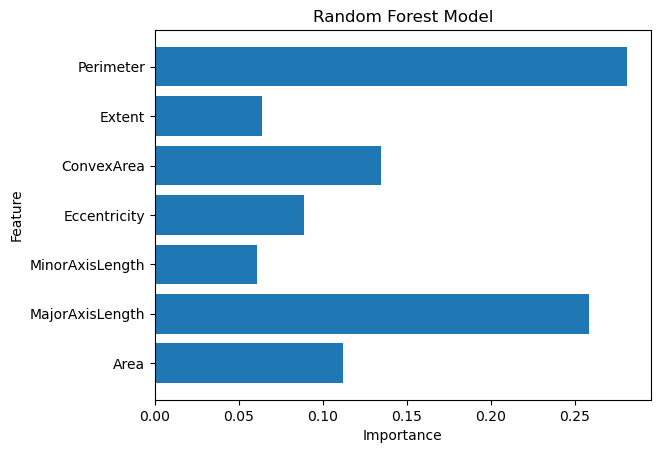

In [441]:
plt.barh(X.columns, rf_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt. title("Random Forest Model")
plt.show()

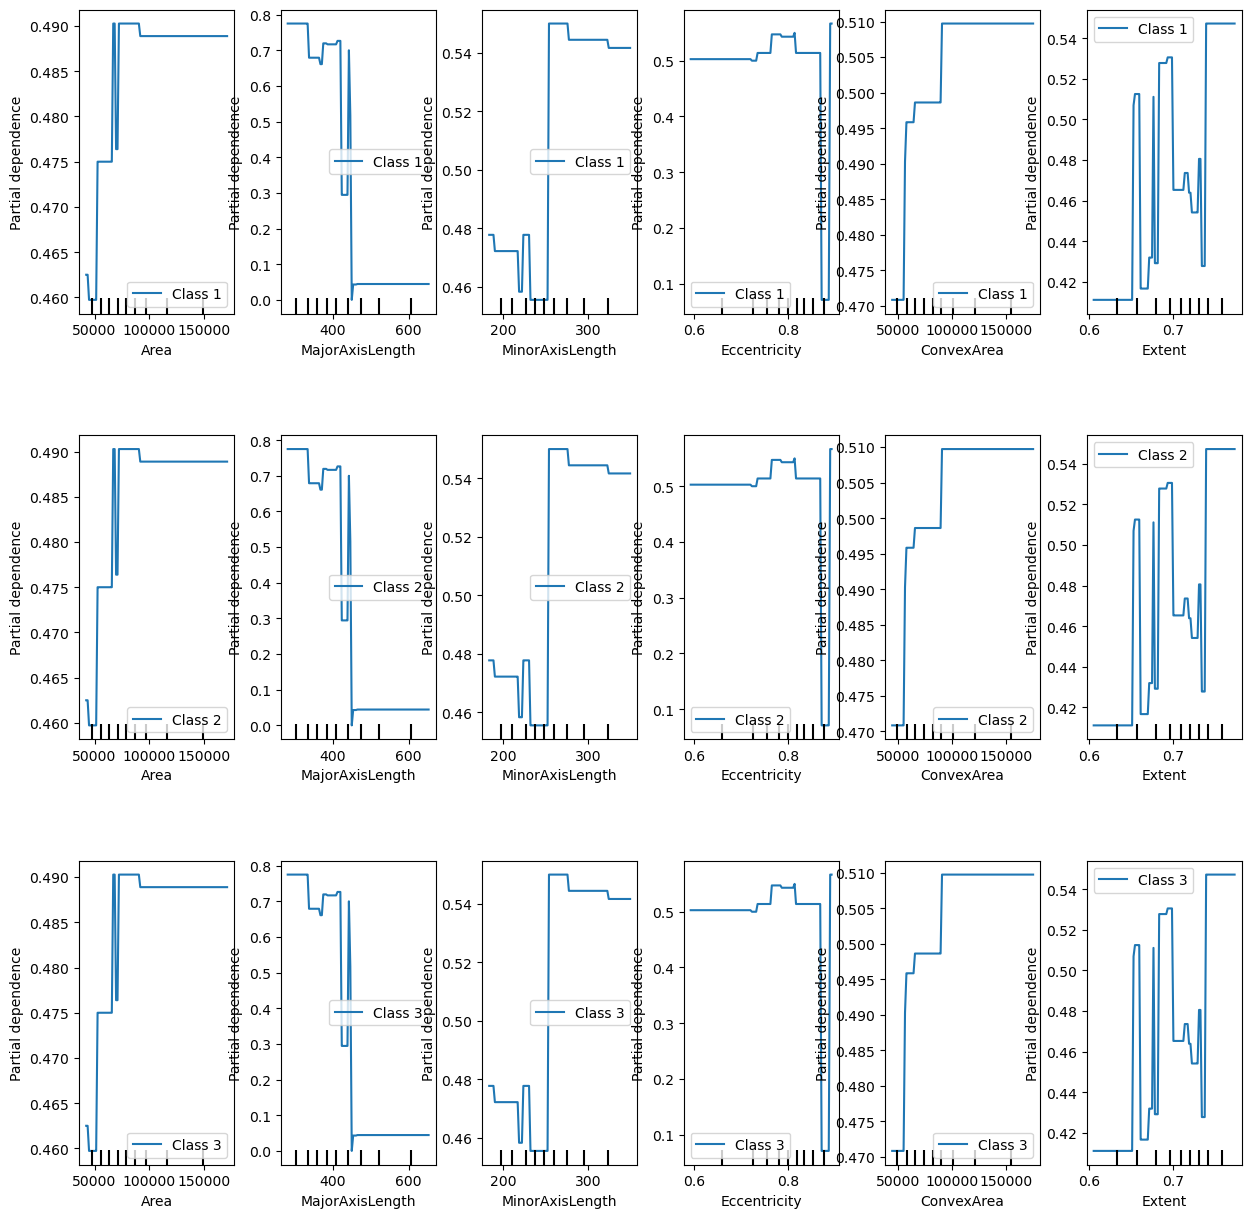

In [451]:
from sklearn.inspection import PartialDependenceDisplay
features = [0,1,2,3,4,5]
targets = [1,2,3,]
fig, ax = plt.subplots(len(targets), len(features), figsize=(15,15))
for i, target in enumerate(targets):
    for j, feature in enumerate(features):
        display = PartialDependenceDisplay.from_estimator(model1, X_train, [feature], target=target, ax= ax[i,j], line_kw={"label":f"Class {target}"})

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

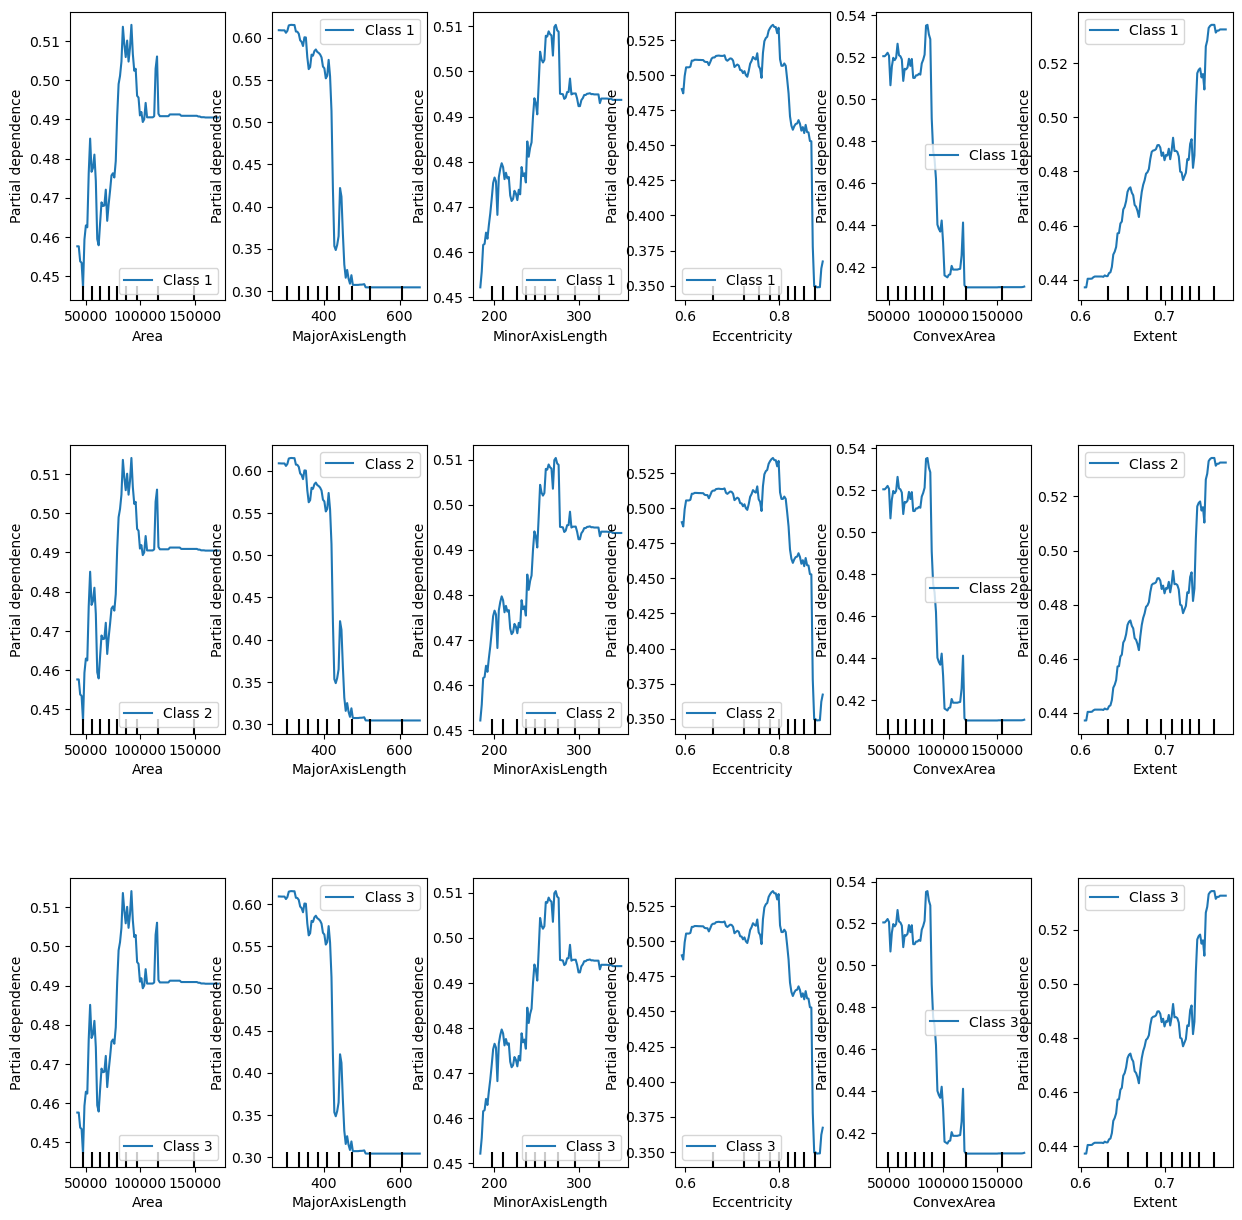

In [454]:
from sklearn.inspection import PartialDependenceDisplay
features = [0,1,2,3,4,5]
targets = [1,2,3,]
fig, ax = plt.subplots(len(targets), len(features), figsize=(15,15))
for i, target in enumerate(targets):
    for j, feature in enumerate(features):
        display = PartialDependenceDisplay.from_estimator(rf_model, X_train, [feature], target=target, ax= ax[i,j], line_kw={"label":f"Class {target}"})

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()